In [2]:
import imageio
import math
import numpy as np

In [3]:
def evaluation(stitched, original):
  '''
  Sum absolute difference
  '''
  stitched, ow, oh = pad_image(stitched, original.shape)
  total_px = ow * oh
  differents = np.count_nonzero(original - stitched[:oh,:ow])

  # percent the same
  return (total_px - differents) / total_px

In [4]:
def rot_eval(stitched, original):
    pass

In [5]:
def pad_image(stitched, target_size):
  sw, sh = stitched.shape
  tw, th = target_size

  nw, nh = (0,0)
  if sw < tw:
      nw = tw - sw
  if sh < th:
      nh = th - sh

  if nw + nh > 0:
    return (np.pad(stitched, ((0, nw), (0, nh)), 'constant', constant_values=(0,0)), tw, th)
  return (stitched, tw, th)

In [6]:
im1 = imageio.imread('../data/T1_Img_002.00.tif')

In [7]:
evaluation(im1, im1)

1.0

In [8]:
im2 = np.copy(im1)
im2[0:2048, 0:2048] = np.ones((2048, 2048), dtype='uint16')
evaluation(im1, im2)

0.7500000596046448

In [9]:
import math
def i_RMSE(stitched, original):
    total_px = len(stitched) * len(original)
    stitched = stitched.astype('float64') / (100)
    original = original.astype('float64') / (100)
    abs_err = abs(original - stitched) ** 2
    print(abs_err)
    return math.sqrt((1/total_px) * abs_err.sum())


In [10]:
import numpy as np
x = np.array([45,67,21,89,33,56])
y = np.array([23,41,45,22,67,99])

i_RMSE(x,y)

[0.0484 0.0676 0.0576 0.4489 0.1156 0.1849]


0.16012148165967266

In [11]:
def fill_fn(fn, size):
    name = fn.__name__
    if name == 'NCC':
        return np.zeros(size)
    elif name == 'SSD' or name == 'SAD':
        return np.full(size, np.inf)

def convolve(im, template, op):
    h_len, w_len = im.shape
    th, tw = template.shape
    op_res = fill_fn(op, (h_len-1, w_len-1))
    for i in range(h_len-th+1):
        for j in range(w_len-tw+1):
            op_res[i,j] = op(im[i:i+th, j:j+tw], template)
    return np.array(op_res)

def NCC(i1, i2):
    '''
    Normalized cross correlation, maximize this
    '''
    assert sum(i1.shape) == sum(i2.shape), 'i1 and i2 are different shapes'
    f_err = i1 - i1.mean()
    t_err = i2 - i2.mean()
    nom = (f_err * t_err).sum()
    dnom = np.square(t_err).sum() * np.square(f_err).sum()
    if math.sqrt(dnom) == 0:
        return 0
    return nom / math.sqrt(dnom)

def SSD(i1, i2):
    '''
    Sum squared differences, minimize this
    '''
    assert sum(i1.shape) == sum(i2.shape), 'i1 and i2 are different shapes'
    sum_square = np.square(i2 - i1).sum() # (A - B)^2 
    return sum_square

def SAD(i1, i2):
    '''
    sum absolute differences, minimize this
    '''
    assert sum(i1.shape) == sum(i2.shape), 'i1 and i2 are different shapes'
    sum_absolute = (abs(i2 - i1)).sum() # | A - B | 
    return sum_absolute

In [12]:
x = np.array([[1,2],[3,4]])
x2 = np.pad(x, ((2,2),(3,2)), 'constant', constant_values=(0,0))

corr = convolve(x2, x, SSD)
_y, _x = np.unravel_index(np.argmin(corr), corr.shape)  # find the match
_y, _x

(2, 3)

In [13]:
corr

array([[30., 30., 30., 30., 30., 30.],
       [30., 30., 23., 13., 22., 30.],
       [30., 30., 12.,  0., 22., 30.],
       [30., 30., 27., 33., 38., 30.],
       [30., 30., 30., 30., 30., 30.]])

In [14]:
corr = convolve(x2, x, NCC)
_y, _x = np.unravel_index(np.argmax(corr), corr.shape)  # find the match
_y, _x

(2, 3)

In [15]:
corr

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.77459667,  0.94387981,  0.25819889,
         0.        ],
       [ 0.        ,  0.        ,  0.73029674,  1.        , -0.13483997,
         0.        ],
       [ 0.        ,  0.        , -0.25819889, -0.81409158, -0.77459667,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])

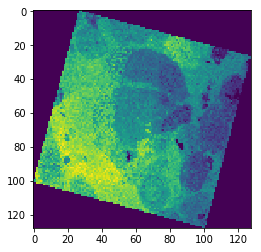

In [39]:
from PIL import Image
from scipy import ndimage

import matplotlib.pyplot as plt

def plot_im(im):
    plt.imshow(im)
    plt.show()

ns_ref = (128,128)
ref_src = Image.open('../data/T1_segment_rot_2.tif')
ref = np.array(ref_src.copy().resize(ns_ref)).astype('uint16')

plot_im(ref)

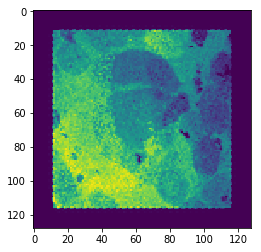

In [43]:
ref2 = ndimage.rotate(ref.copy(), 15, reshape=False)
plot_im(ref2)

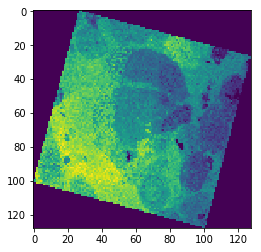

In [42]:
plot_im(ref)